# 1. 강의영상 

# 2. Imports 

In [52]:
import time
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3. 타입힌트

## A. 왜 배워야함?

In [1]:
name: str = "Alice"
age: int = 30
height: float = 1.75
is_student: bool = True

함수 매개변수와 반환값에 타입지정 

In [5]:
def greet(name: str) -> str:
    return f"Hello, {name}!"

def add(a: int, b: int) -> int:
    return a + b

def get_length(lst: list) -> int:
    return len(lst)

복합타입지정 

In [6]:
from typing import List, Tuple, Dict

def process_items(items: List[str]) -> int:
    return len(items)

def get_coordinates() -> Tuple[float, float]:
    return (45.0, 90.0)

def count_words(text: str) -> Dict[str, int]:
    words = text.split()
    return {word: words.count(word) for word in words}

Optional 타입

In [9]:
from typing import Optional

def find_item(items: List[str], search: str) -> Optional[int]:
    try:
        return items.index(search)
    except ValueError:
        return None

사용자 정의 타입 

In [7]:
from typing import Optional

def find_item(items: List[str], search: str) -> Optional[int]:
    try:
        return items.index(search)
    except ValueError:
        return None

Union 타입

In [11]:
from typing import Union

def process_value(value: Union[int, str]) -> str:
    if isinstance(value, int):
        return f"Number: {value}"
    else:
        return f"String: {value}"

Any

In [12]:
from typing import Any

def print_value(value: Any) -> None:
    print(value)

Callable 타입

In [57]:
from typing import Callable

def apply_function(x: int, func: Callable[[int], int]) -> int:
    return func(x)

def square(n: int) -> int:
    return n * n

result = apply_function(5, square)
print(result)  # 출력: 25

25


# 4. 함수

## A. 대표예시 

`# 예제1` -- 은근히 짜증났던 `plt.plot()`

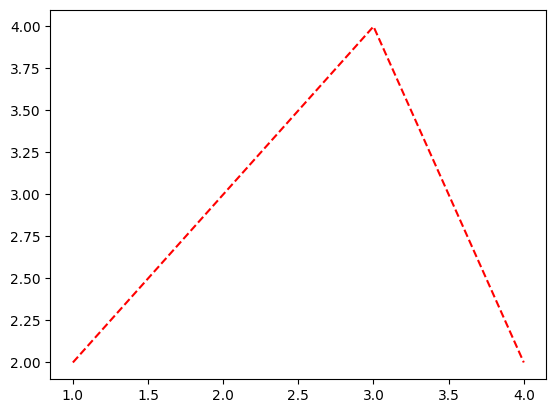

In [10]:
plt.plot([1,2,3,4],[2,3,4,2],'r--')

In [11]:
plt.plot([1,2,3,4],[2,3,4,2],color='lime','--')

SyntaxError: positional argument follows keyword argument (2277522587.py, line 1)

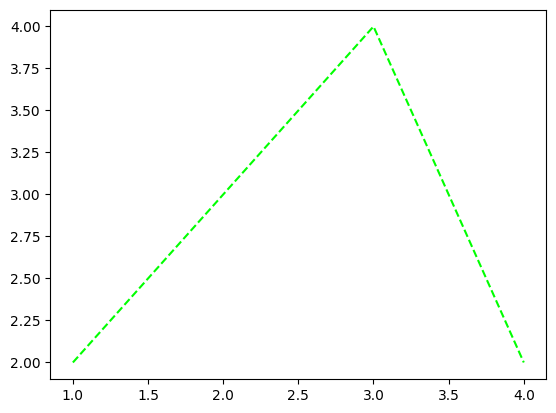

In [12]:
plt.plot([1,2,3,4],[2,3,4,2],'--',color='lime')

`#`

## B. 개념 

```Python
func(arg1, arg2, /, *args, x1, x2, *, kwarg1, kwarg2, **kwargs):
```

`-` 정리 

In [ ]:
| |존재해야함|생략가능|
위치인자|

## C. 개념을 위한 예제들

`예제1` -- 두 벡터 x,y가 주어졌을때 `R`에서 cbind와 같은 역할을 하는 함수를 구현하라. 

![](https://guebin.github.io/DV2023/posts/13wk-1_files/figure-html/24ea9555-553e-4f7f-a586-1f02f07f15da-1-4a202b51-fe9c-4c61-bcc6-2442f586450d.png)
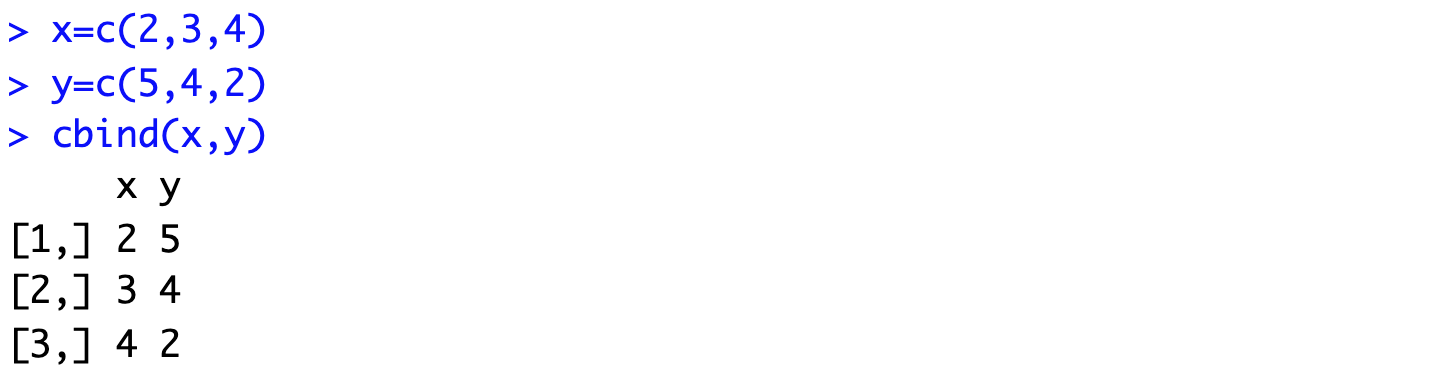

In [13]:
def cbind(x,y):
    rslt = np.stack([x,y],axis=1)
    return rslt 

In [14]:
cbind([2,3,4],[5,4,2])

array([[2, 5],
       [3, 4],
       [4, 2]])

`#`

`# 예제2` -- 세개이상의 벡터가 온다면? 

`-` args를 이용하여 이후 입력을 받음 

In [16]:
def cbind(*args):
    rslt = np.stack(args,axis=1)
    return rslt 

In [18]:
cbind([1,1,1],[2,2,2],[3,3,3],[4,4,4])

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

- args는 함수내부에서 "튜플"로 취급된다!!

`#`

`# 예제3` -- 기본적으로는 cbind의 동작을 하지만 경우에 따라서 rbind처럼 동작하길 원한다면? 

`-` `axis`라는 변수를 따로 생성하여 입력으로 처리, 기본값은 1

In [29]:
def bind(*args,axis=1):
    rslt = np.stack(args,axis=axis)
    return rslt 

In [30]:
bind([1,1,1],[2,2,2],[3,3,3],axis=0)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

`#`

`# 예제4` -- stack의 다른 부가적인 옵션도 쓰고싶다면? 

`-` `np.stack`은 여러기능이 있음 

In [31]:
np.stack?

Signature:       np.stack(arrays, axis=0, out=None, *, dtype=None, casting='same_kind')
Call signature:  np.stack(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function stack at 0x7f1032daf520>
File:            ~/anaconda3/envs/r/lib/python3.10/site-packages/numpy/core/shape_base.py
Docstring:      
Join a sequence of arrays along a new axis.

The ``axis`` parameter specifies the index of the new axis in the
dimensions of the result. For example, if ``axis=0`` it will be the first
dimension and if ``axis=-1`` it will be the last dimension.

.. versionadded:: 1.10.0

Parameters
----------
arrays : sequence of array_like
    Each array must have the same shape.

axis : int, optional
    The axis in the result array along which the input arrays are stacked.

out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what stack would have returned if no
    out argument were specified.

dtype 

In [42]:
def bind(*args,axis=1,**kwargs):
    rslt = np.stack(args,axis=axis,**kwargs)
    return rslt 

In [43]:
bind([1,1,1],[2,2,2],[3,3,3],axis=0,dtype=float)

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

`#`

`# 예제6` -- 위치인자를 키워드인자보다 뒤에 넣을 경우?

In [44]:
bind(axis=0,[1,2,3],[2,3,4])

SyntaxError: positional argument follows keyword argument (3063801598.py, line 1)

In [45]:
bind([1,2,3],[2,3,4],axis=0)

array([[1, 2, 3],
       [2, 3, 4]])

In [46]:
bind([1,2,3],[2,3,4],axis=0,[3,4,5])

SyntaxError: positional argument follows keyword argument (3465570716.py, line 1)

`#`

`# 예제7` -- 가변키워드인자가 존재할 때, 키워드인자의 키를 잘못 입력할 경우? 

In [47]:
bind([1,2,3],[2,3,4],axis=0,data_type=float)

TypeError: stack() got an unexpected keyword argument 'data_type'

`-` 요약

- 함수의 입력은 꽤 복잡한 방식으로 동작한다. 
- 위치인자의 위치를 잘못 넣으면 동작하지 않는다. 
- 가변키워드 인자가 존재할 때, 키워드인자의 키를 다른이름으로 넣으면 에러가 발생하지 않는다. (그냥 무시) 

`#`

# 5. `with`

## A. 대표예제 

`-` 예제1

In [ ]:
f=open('test.txt')

In [ ]:
a=f.read()

In [ ]:
print(a)

hello
hello2
hello3


In [ ]:
f.closed

False

현재 f가 열려있는 상태이다. 따라서 닫아줘야 한다. 

In [ ]:
f.close()

In [ ]:
f.closed

True

f가 닫힌 상태에서는 더 이상 읽을 수가 없다. 

In [ ]:
b=f.read()

ValueError: I/O operation on closed file.

파일을 닫지 않는다고 해서 큰 문제는 없어보이지만 그냥 닫는것이 좋다. 

## B. 개념 

`-` 생각해 보니까 파일을 열면 항상 닫아야 한다. 

이처럼 쌍(시작-끝)으로 수행되는 처리가 반복적으로 발생하는 경우가 있는데 그때마다 `.close()` 메소드 따위를 쓰는 것이 번거롭게 느껴진다. 

예를들면 파일을 열었으면 적당한 동작뒤에 알아서 닫아졌으면 좋겠다는 것이다. 

이러한 모티브에서 구현된 것이 with문 이다. 

In [ ]:
with open('test.txt') as g: 
    print(g.read())

hello
hello2
hello3


파일이 닫아졌는지 확인해보자. 

In [ ]:
g.closed

True

잘 닫아졌다. 

#### 기본사용법

with의 사용법은 직관적으로 이해가 가능하지만 그래도 다시한번 살펴보자. 

```python
with blabla as variable: 
    yadiyadi
    yadiyadi2
```

(1) `with blabla as variable`에서 blabla가 실행된다. 

(2) blabla의 실행결과로 어떠한 `특별한` 오브젝트가 만들어지는데 그 오브젝트를 우리가 variable로 부르기로 한다. 

(3) 탭으로 들여쓰기된 부분, 즉 yadiyadi, yadiyadi2 가 순서대로 실행된다. 

(4) 탭으로 들여쓰기된 부분이 실행되고 난 뒤에 `g.closed()` 따위의 미리 약속된 어떠한 코드가 실행되는것 같다. 

#### 동작원리 

g라는 오브젝트는 특별한 오브젝트라고 했는데, 무엇이 특별한지 알아보자. 

In [ ]:
dir(g)

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'reconfigure',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'write_through',
 'writelines']

비밀은 `__enter__` 와 `__exit__` 메소드에 있다. 

`__enter__` 와 `__exit__` 의 역할을 알아보기 위해서 아래의 코드를 다시 관찰하자. 

```python
with open('test.txt') as g: 
    print(g.read())
```

(for문 복습) `for i in ...:` 에서 `...`에 올 수 있는 오브젝트는 `__iter__` 메소드가 정의되어 있어야 한다. 이러한 오브젝트를 iterable한 오브젝트라고 한다. 

(with문) `with ... as variable:` 에서 `...`의 실행결과로 생성되는 오브젝트는 `__enter__` 와 `__exit__` 메소드가 정의되어 있어야 한다. 
 - 이중 `__enter__`는 with문이 시작되면 자동으로 실행된다. 
 - 이중 `__exit__`는 with문이 끝나면 자동으로 실행된다. 

자료의 형태변환 

## C. 개념을 위한 예제들

`-` 예제3 

In [ ]:
class MooYaHo:
    def __init__(self):
        print('init')
    def __enter__(self):
        print('무야호')
    def __exit__(self,exc_type,exc_value,traceback): # self 이외의 3가지 변수는 예외처리에 관련된 변수인데 여기서는 다루지 않음. 
        print('그만큼 신나시는거지')

In [ ]:
with MooYaHo() as a: 
    print('.')

init
무야호
.
그만큼 신나시는거지


`-` 경우에 따라서는 as 이하를 생략할 수도 있다. 

In [ ]:
with MooYaHo():
    print('xx')

init
무야호
xx
그만큼 신나시는거지


# 6. 데코레이터

## A. 개념 

`-` 데코레이터 쓰는법 

1. 함수입력,함수출력을 수행하는 함수를 만든다. 
2. 입력함수 위에 데코를 쓴다. 그러면 그 입력함수는 출력함수로 바뀐다. 

`-` 데코레이터 코드 템플릿1 -- 이걸 외우진 마세요 

**데코레이터 선언**

```Python
def decorator_name(func):
    ...
    return wrapper
```

```Python
def 꾸밈함수이름(입력함수):
    ... 
    return 출력함수
```

**데코레이터 사용**

```Python
@decorator_name
def myfunc():
    pass
```

```Python
@꾸밈함수이름
def 꾸밈당하는함수():
    pass 
```

`# 예제1` -- 코드 템플릿1: 사용예시

In [337]:
# 데코레이터 선언
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

In [338]:
def f(x):
    return x**2
list(map(f,[1,2,3,4,5]))

[1, 4, 9, 16, 25]

In [341]:
@무조건메롱을리턴
def f(x):
    return x**2
list(map(f,[1,2,3,4,5]))

['메롱', '메롱', '메롱', '메롱', '메롱']

`#`

`# 예제2` -- 데코레이터와 같은코드

`-` 코드1

In [352]:
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

def f(x):
    return x**2

f = 무조건메롱을리턴(f)

[f(x) for x in range(5)]

['메롱', '메롱', '메롱', '메롱', '메롱']

`-` 코드2

In [351]:
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

@무조건메롱을리턴
def f(x):
    return x**2

[f(x) for x in range(5)]

['메롱', '메롱', '메롱', '메롱', '메롱']

`-` 좀 더 확장하면.. 

```Python
@dec2
@dec1
def func(arg1, arg2, ...):
    pass
```

```Python
def func(arg1, arg2, ...);
    pass 
func = dec2(dec1(func))
```

`-` 데코레이터 코드 템플릿2 -- 아래의 형태를 기억할것 

```Python
def decorator_name(func):
    def wrapper(*args, **kwargs):
        args = list(args)
        kwargs = dict(kwargs)
        func_result = func(*args, **kwargs)
        return func_result
    return wrapper
```

```Python
def 꾸밈함수이름(입력함수):
    def 출력함수(*args, **kwargs):
        args = list(args)
        kwargs = dict(kwargs)
        입력함수의출력 = 입력함수(*args, **kwargs)
        return 입력함수의출력
    return 출력함수
```

## B. 대표예시

`# 예제1` -- 출력결과는 항상 리스트로

In [417]:
def 출력은리스트로(func):
    def wrapper(*args,**kwargs):
        func_result = func(*args,**kwargs)
        return list(func_result)
    return wrapper

In [423]:
def 입력은넘파이로(func):
    def wrapper(*args,**kwargs):
        args = [np.array(l) for l in args]
        kwargs = {k:np.array(v) for k,v in kwargs.items()}
        func_result = func(*args,**kwargs)
        return func_result
    return wrapper

In [424]:
@출력은리스트로
@입력은넘파이로
def add(a,b):
    return a+b    

In [425]:
add([1,2,3],[2,3,4])

[3, 5, 7]

`#`

`# 예시2` -- 실행시간측정 

In [426]:
def 시간측정(func):
    def wrapper(*args,**kwargs):
        t1 = time.time()
        func_result = func(*args,**kwargs)
        t2 = time.time()
        print(f"실행시간: {t2-t1}")
        return func_result 
    return wrapper

In [427]:
@시간측정
@출력은리스트로
@입력은넘파이로
def sub(a,b):
    return a-b 

In [428]:
sub([1,2,3],[1,2,3])

실행시간: 2.6464462280273438e-05


[0, 0, 0]

`#` 

`# 예시3` -- 출력결과 시각화 

In [443]:
def 출력시각화(func):
    def wrapper(*args,**kwargs):
        func_result = func(*args,**kwargs)
        plt.plot(func_result,'--o')
        return func_result 
    return wrapper

In [444]:
@출력시각화
@입력은넘파이로
def mul(a,b):
    return a*b 

array([ 2, -3,  4])

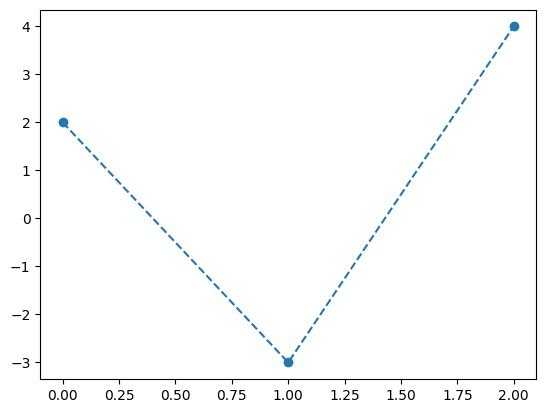

In [445]:
mul([1,-1,1],[2,3,4])

## C. 내장 데코레이터 

`-` 아래는 모두 내장데코레이터였음.. 

```Python
@staticmethod
@classmethod
@staticmethod
```

# 7. 제너레이터

## A. 대표예제  

`# 예시1` -- `for`/`if` 마스터..

In [622]:
att = np.random.choice(np.arange(10,21)*5,20); rep = np.random.choice(np.arange(5,21)*5,20); mid = np.random.choice(np.arange(0,21)*5,20); fin = np.random.choice(np.arange(0,21)*5,20)
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin})
df

,att,rep,mid,fin
0,80,55,65,95
1,100,80,15,25
2,90,55,5,95
3,100,95,55,85
4,50,35,90,100
5,100,75,80,10
6,80,100,50,15
7,80,80,25,40
8,55,90,90,50
9,70,90,100,70


In [356]:
grades = [] 
for i in range(len(df)):
    row = df.iloc[i]
    att,rep,mid,fin = row 
    total = att*0.1 + rep*0.2 + mid *0.3 + fin*0.4
    if total >= 70: 
        grade =  "A+"
    elif 40 < total: 
        grade = "B0"
    else: 
        grade = "F"
    grades.append(grade)

In [357]:
grades

['B0',
 'A+',
 'B0',
 'F',
 'B0',
 'B0',
 'B0',
 'B0',
 'B0',
 'A+',
 'A+',
 'A+',
 'B0',
 'B0',
 'B0',
 'A+',
 'B0',
 'B0',
 'B0',
 'B0']

`#`

`# 예시2` -- 사실 머리속에는 파이프라인의 개념이 있지 않나? 

In [369]:
row = df.iloc[0]
row

att    50
rep    85
mid    60
fin     5
Name: 0, dtype: int64

In [370]:
def calculate_total(row):
    att, rep, mid, fin = row 
    total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4 
    return total

In [371]:
total = calculate_total(row)
total

42.0

In [372]:
def make_grade(total):
    if total >= 70: 
        return "A+"
    elif 40 < total: 
        return "B0"
    else: 
        return "F"    

In [373]:
make_grade(total)

'B0'

In [375]:
# 깔끔 그자체
row = df.iloc[0]
total = calculate_total(row)
grade = make_grade(total) 

In [377]:
# 그렇지만 for문과 결합하면 더러워짐 
n = len(df)
grades = []
for i in range(n):
    row = df.iloc[i]
    total = calculate_total(row)
    grade = make_grade(total)
    grades.append(grade) 
grades

['B0',
 'A+',
 'B0',
 'F',
 'B0',
 'B0',
 'B0',
 'B0',
 'B0',
 'A+',
 'A+',
 'A+',
 'B0',
 'B0',
 'B0',
 'A+',
 'B0',
 'B0',
 'B0',
 'B0']

`# 예시3` -- 제너레이터의 개발 

`-` row-wise 하게 쪼갠다. 

In [635]:
def each_row(df):
    n = len(df) 
    for i in range(n):
        yield df.iloc[i]

In [636]:
rows = each_row(df) 

`-` total을 계산한다. (row 별로)

In [637]:
def calculate_total(rows):
    for row in rows:
        att, rep, mid, fin = row 
        total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4 
        yield total

In [638]:
totals = calculate_total(rows)

`-` grade를 계산한다 (row별로)

In [639]:
def make_grade(totals):
    for total in totals:
        if total >= 70: 
            yield "A+"
        elif 40 < total: 
            yield "B0"
        else: 
            yield "F"

In [640]:
grades = make_grade(totals)

`-` 합친다.. (형태변환)

In [641]:
list(grades)

['A+',
 'B0',
 'B0',
 'A+',
 'A+',
 'B0',
 'B0',
 'B0',
 'A+',
 'A+',
 'A+',
 'A+',
 'F',
 'B0',
 'B0',
 'B0',
 'B0',
 'B0',
 'A+',
 'F']

`-` 최종코드 

In [644]:
rows = each_row(df) 
totals = calculate_total(rows)
grades = make_grade(totals)
df.assign(grade = list(grades))

,att,rep,mid,fin,grade
0,80,55,65,95,A+
1,100,80,15,25,B0
2,90,55,5,95,B0
3,100,95,55,85,A+
4,50,35,90,100,A+
5,100,75,80,10,B0
6,80,100,50,15,B0
7,80,80,25,40,B0
8,55,90,90,50,A+
9,70,90,100,70,A+


`#`

## B. 제너레이터의 개념

`-` 제너레이터의 정체: 이터레이터 + $\alpha$

In [192]:
lst = [1,2,3] 
lst_iterator = iter(lst) 

In [193]:
isinstance(lst_iterator,collections.abc.Generator)

False

In [227]:
def make_gen(lst):
    for l in lst:
        yield l 

In [228]:
lst_generator = make_gen(lst)

In [229]:
isinstance(lst_generator,collections.abc.Generator)

True

In [230]:
collections.abc.Generator?

Init signature: collections.abc.Generator()
Docstring:      <no docstring>
File:           ~/anaconda3/envs/r/lib/python3.10/collections/abc.py
Type:           ABCMeta
Subclasses:     

In [231]:
set(dir(lst_generator))-set(dir(lst_iterator))

{'__del__',
 '__name__',
 '__qualname__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw'}

`-` 만드는 방법1: 함수를 이용하는 방법 

In [232]:
def make_gen(lst):
    for l in lst:
        yield l

In [234]:
make_gen([1,2,3])

<generator object make_gen at 0x7f10ff6f78b0>

`-` 만드는 방법2: 제너레이터 표현식 (튜플 컴프리헨션이라고 속으로 생각해도 무방, 튜플 컴프리헨션은 없는 용어임) 

In [235]:
(l for l in [1,2,3])

<generator object <genexpr> at 0x7f10ff6f7a00>

## C. 개념을 위한 예제들

`# 예시1` 

In [236]:
def make_gen():
    yield 1
    yield 2
    yield 3
gen = make_generator()

In [237]:
for i in gen:
    print(i)

1
2
3


In [238]:
gen = make_gen()

In [239]:
next(gen)

1

In [240]:
next(gen)

2

In [241]:
next(gen)

3

In [242]:
next(gen)

StopIteration: 

`#`

`# 예시2` -- 무한시퀀스 + 지연실행 

In [259]:
def make_gen():
    a = 3 
    yield a 
    while True:
        a = a+2 
        yield a 

In [260]:
gen = make_gen()

In [261]:
lst = [] 

In [262]:
for _ in range(10):
    lst.append(next(gen))

In [263]:
lst

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [264]:
for _ in range(10):
    lst.append(next(gen))

In [265]:
lst

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]

`#`

# 8. 상속

## A. 상속의 사용방법

`-` 클래스를 조금 수정하고 싶을때, 아래와 같은 문법을 이용하면 편리하다. 

```Python
class 새로운_클래스_이름(수정할_클래스_이름): 
    def 수정_및_추가할_함수이름(self,...):
        ...
```

`# 예시1` -- UpJump

```{mermaid}
flowchart LR
  C[UpJump] --> |"거슬러올라가면"| A[Up]
```

In [93]:
class Up:
    def __init__(self):
        self.value = 0
    def up(self):
        self.value = self.value + 1 
    def __repr__(self):
        return str(self.value) 

In [94]:
class UpJump(Up):
    def jump(self,jump_size):
        self.value = self.value + jump_size

`#`

`# 예시2` -- `AddMul` 클래스

`-` Add 클래스 선언 

In [105]:
class Add:
    def __init__(self,a,b):
        self.a = a 
        self.b = b 
    def add(self):
        return self.a + self.b 

In [108]:
a = Add(2,3)

In [109]:
a.add()

5

In [110]:
a.mul()

AttributeError: 'Add' object has no attribute 'mul'

`-` Mul 클래스 선언 

In [113]:
class Mul:
    def __init__(self,a,b):
        self.a = a 
        self.b = b 
    def mul(self):
        return self.a * self.b 

In [114]:
a = Mul(3,4)
a.mul()

12

In [115]:
a.add()

AttributeError: 'Mul' object has no attribute 'add'

`-` AddMul 클래스를 선언 (기존의 Add, Mul 상속받아서 이용)

```{mermaid}
flowchart LR
  C[AddMul] --> |"거슬러올라가면"| A[Add]
  C[AddMul] --> |"거슬러올라가면"| B[Mul] 
```

In [116]:
class AddMul(Add,Mul):
    pass 

In [119]:
a = AddMul(2,3)

In [120]:
a.add()

5

In [121]:
a.mul()

6

> 어, 근데 `__init__`이 겹치지 않나? 

In [122]:
class Add:
    def __init__(self,a,b):
        print("Add클래스에서 정의된 __init__ 메소드가 실행됩니다")
        self.a = a 
        self.b = b 
    def add(self):
        return self.a + self.b 
class Mul:
    def __init__(self,a,b):
        print("Mul클래스에서 정의된 __init__ 메소드가 실행됩니다")        
        self.a = a 
        self.b = b 
    def mul(self):
        return self.a * self.b    
class AddMul(Add,Mul):
    pass     

In [124]:
a = AddMul(5,6)

Add클래스에서 정의된 __init__ 메소드가 실행됩니다


- 알아서 교통정리함 

`-` 교통정리하는 비법? 

In [125]:
AddMul.__mro__

(__main__.AddMul, __main__.Add, __main__.Mul, object)

개념상 아래와 같은 서열인데, 

```{mermaid}
flowchart LR
  B[Add] --> |"거슬러올라가면"| A[object]
  C[Mul] --> |"거슬러올라가면"| A[object]
  D[AddMul] --> |"거슬러올라가면"| B[Add]
  D[AddMul] --> |"거슬러올라가면"| C[Mul]
```



공식적으로는 아래와 같은 서열로 이해한다. 

```{mermaid}
flowchart LR
  C[Mul] --> |"거슬러올라가면"| A[object]
  D[AddMul] --> |"거슬러올라가면"| B[Add]
  B[Add] --> |"거슬러올라가면"| C[Mul]
```



::: {.callout-note}
모든 상속구조를 거슬러 올라가면 피라미드의 정점에 `object` 클래스가 있다. 즉 `object`는 최상위 super 클래스이다. 아래의 말을 기억하자. 

> 모든 클래스는 `type` 클래스에서 찍힌 인스턴스이며, 모든 클래스는 `object` 클래스의 subclass이다. 

그냥 개념놀음임.. 
:::

::: {.callout-warning}

다이어그램 표시시 object는 앞으로 생략하겠음. 
:::

::: {.callout-note}
아래는 같은코드임 

```Python
# 코드1
class Klass():
    pass
```
```Python
# 코드2
class Klass(object):
    pass
```
코드1은 사실상 코드2의 생략버전임. 
:::

`#`

## B. `super()`

`# 예시1` -- 기본적인 사용법 

```{mermaid}
flowchart LR
  B[Student] --> |"거슬러올라가면"| A[StudentWrong]
```

In [15]:
class StudentWrong:
    def __init__(self,age=20.0, semester=0):
        self.age = age 
        self.semester = semester
        print(f"입학을 축하합니다. 당신의 나이는 {self.age}이고 현재 학기는 {self.semester}학기 입니다.")
    def __repr__(self):
        text = f"나이: {self.age}\n학기: {self.semester}"
        return text
    def __add__(self,registration_status):
        if registration_status == "휴학":
            self.age = self.age +0.5 
        elif registration_status == "등록":
            self.age = self.age +0.5 
            self.semester = self.semester + 1
class Student(StudentWrong):
    def __add__(self,registration_status):
        #super().__add__(registration_status) # 방법1 
        super(Student,self).__add__(registration_status) # 방법2 
        #super(__class__,self).__add__(registration_status) # 방법3 
        return self

In [16]:
boram = Student()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [17]:
boram + 1 + 2

나이: 20.0
학기: 0

`#`

`-` `super()`는 슈퍼클래스의 인스턴스 비슷한걸 리턴해준다. (유령이라 생각하자)

![](https://i.namu.wiki/i/BNGVH36IAZ39pH12nstA_1TJ2qLlovX21z9L8TKXIxG4hRTFJm0oz4S0Bv--xAPvZGz9wSuKgFZLylyLLWH9Co8f7IRqIZ9RA-PB9Pzy9cK_dZAKw5xberY6EPc3-xwW8yOKt8AtrVxxhOFemzNbTA.webp)

`# 예시2` -- 빙의

아래와 같은 문제를 풀고 싶다고 하자. 

0. 사과가 2개씩 3묶음 있다. 사과는 총 몇 묶음인가?
1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가? 
2. [1,2,3]의 평균은 얼마인가? 
3. 100을 3으로 나누면 나머지가 얼마인가? 
4. 2와 3의 최소공배수는 무엇인가? 

```{mermaid}
flowchart LR
  B[ProblemSolver3] --> |"거슬러올라가면"| C[ProblemSolver2]
  C[ProblemSolver2] --> |"거슬러올라가면"| D[ProblemSolver1]
```

In [165]:
class ProblemSolver1():
    def __init__(self):
        self.sheet = ["?", "?", "?", "?", "?"]     
    def solve(self):
        # 0. 사과가 2개씩 3묶음 있다. 사과는 총 몇 묶음인가?
        self.sheet[0] = 6

In [19]:
a = ProblemSolver1()

In [20]:
a.sheet

['?', '?', '?', '?', '?']

In [21]:
a.solve()

In [22]:
a.sheet

[6, '?', '?', '?', '?']

In [23]:
class ProblemSolver2(ProblemSolver1):
    def solve(self):
        # 2. [1,2,3]의 평균은 얼마인가?
        # 3. 100을 3으로 나누면 나머지가 얼마인가?
        # 4. 2와 3의 최소공배수는 무엇인가?
        ghost1 = super()
        ghost1.solve()
        self.sheet[2] = 2
        self.sheet[3] = 1
        self.sheet[4] = 6

In [24]:
a = ProblemSolver2()

In [25]:
a.solve()

In [26]:
a.sheet

[6, '?', 2, 1, 6]

In [27]:
class ProblemSolver3(ProblemSolver2):
    def solve(self):
        # 1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가?
        ghost2 = super()
        ghost2.solve() 
        self.sheet[1] = -1
    def say(self):
        print("다풀었어요")

In [28]:
a = ProblemSolver3()

In [29]:
a.solve()

In [30]:
a.sheet

[6, -1, 2, 1, 6]

In [31]:
a.say()

다풀었어요


***그런데 2층에서 3층 아래로가면 사실 지하 2층이다..***

```{mermaid}
flowchart LR
  A[ProblemSolver4] --> |"거슬러올라가면"| B[ProblemSolver3]
  B[ProblemSolver3] --> |"거슬러올라가면"| C[ProblemSolver2]
  C[ProblemSolver2] --> |"거슬러올라가면"| D[ProblemSolver1]
```

In [32]:
class ProblemSolver4(ProblemSolver3):
    def solve(self):
        ghost2 = super(ProblemSolver3,self) 
        ghost2.solve() 
        self.sheet[1] = -2 

In [33]:
a = ProblemSolver4()
a.solve()

In [34]:
a.sheet

[6, -2, 2, 1, 6]

In [35]:
a.say()

다풀었어요


`-` `ProblemSolver4`를 아래와 같이 구현한다면? (틀린구현) // 빙의개념을 이해할것

```{mermaid}
flowchart LR
  A[ProblemSolver4Wrong] --> |"거슬러올라가면"| B[ProblemSolver3]
  B[ProblemSolver3] --> |"거슬러올라가면"| C[ProblemSolver2]
  C[ProblemSolver2] --> |"거슬러올라가면"| D[ProblemSolver1]
```

In [166]:
class ProblemSolver4Wrong(ProblemSolver3):
    def solve(self):
        solver2 = ProblemSolver2()
        solver2.solve() 
        self.sheet[1] = -2 

In [167]:
a = ProblemSolver4Wrong()
a.solve()

In [168]:
a.sheet

['?', -2, '?', '?', '?']

`#`

## C. `super()` 쓰지 않기

`-` 예전에는 `super()`가 없었다고 한다.

`# 예제1` -- super()를 이용 vs 이용하지 않음

```{mermaid}
flowchart LR
  A[Dummy] --> |"거슬러올라가면"| B[Dummy2]
```

*직선상속*

`-` 코드1: `super()` 사용 -- 권장 

In [72]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        
    
a = Dummy2()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행


`-` 코드2: `super()` 사용X -- 권장X

In [71]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        Dummy.__init__(self)
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        
    
a = Dummy2()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행


`#`

`# 예제2` -- 안쓰는 이유 

```{mermaid}

flowchart LR
  B[Dummy2] --> |"거슬러올라가면"| A[Dummy]
  C[Dummy3] --> |"거슬러올라가면"| A[Dummy]
  D[Dummy4] --> |"거슬러올라가면"| B[Dummy2]
  D[Dummy4] --> |"거슬러올라가면"| C[Dummy3]
```

*다이아몬드상속*

`-` 코드1: `super()` 사용 -- 권장 

In [83]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super().__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


`-` 코드2: `super()` 사용X -- 권장X

In [84]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        Dummy.__init__(self)
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        Dummy.__init__(self)
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        Dummy2.__init__(self)
        Dummy3.__init__(self)
        self.d = 0 
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행
인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


`-` 원리

In [133]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super().__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


In [134]:
Dummy4.__mro__

(__main__.Dummy4, __main__.Dummy2, __main__.Dummy3, __main__.Dummy, object)

`Dummy4.__mro__` 를 타고 올라가서 제일 꼭대기부터 한번씩만 `__init__()` 을 실행함. 

`#`

`# 예제3` -- 오개념 방지를 위한 예제들 

```{mermaid}

flowchart LR
  B[Dummy2] --> |"거슬러올라가면"| A[Dummy]
  C[Dummy3] --> |"거슬러올라가면"| A[Dummy]
  D[Dummy4] --> |"거슬러올라가면"| B[Dummy2]
  D[Dummy4] --> |"거슬러올라가면"| C[Dummy3]
```

*다이아몬드상속*

`-` 코드1: 결과를 예상해보자.

In [155]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super(Dummy2,self).__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


우리가 원한건 

```
인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행
```

였는뎅.. 

왜 이런일이? 

`-` `mro/super`는 상속순서를 직선으로 재정렬함 

개념적으로는 아래구조의 상속이지만

```{mermaid}

flowchart LR
  B[Dummy2] --> |"거슬러올라가면"| A[Dummy]
  C[Dummy3] --> |"거슬러올라가면"| A[Dummy]
  D[Dummy4] --> |"거슬러올라가면"| B[Dummy2]
  D[Dummy4] --> |"거슬러올라가면"| C[Dummy3]
```

실제로는 아래구조의 상속임 

```{mermaid}

flowchart LR
  A[Dummy4] --> |"거슬러올라가면"| B[Dummy2]
  B[Dummy2] --> |"거슬러올라가면"| C[Dummy3]
  C[Dummy3] --> |"거슬러올라가면"| D[Dummy]
```

In [159]:
Dummy4.mro()

[__main__.Dummy4, __main__.Dummy2, __main__.Dummy3, __main__.Dummy, object]

따라서 `super(Dummy2,self)` 가 구체화하는건 Dummy의 유령인스턴스가 아니라 Dummy3의 유령인스턴스임 

`-` 코드2: 결과를 예상해보자. 

In [163]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        Dummy.__init__(self)
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


> 이러면 혼란이 없음 

`-` 코드3: 결과를 예상해보자. 

In [164]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy3,Dummy2):
    def __init__(self):
        super(Dummy2,self).__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


> `super()`를 굳이 써야겠으면 Dummy4를 정의할때 mro를 고려하여 `class Dummy4(Dummy2,Dummy3):` 대신에 `class Dummy4(Dummy3,Dummy2):` 로 바꿔주면 된다. 

`#`

## D. 리스트의 상속 -- 쓰지마세여

`-` list와 비슷한데 멤버들의 빈도가 계산되는 메소드를 포함하는 새로운 나만의 list를 만들고 싶다. 

In [495]:
lst = list('asdfasssdfa')
lst 

['a', 's', 'd', 'f', 'a', 's', 's', 's', 'd', 'f', 'a']

`-` 각 원소들의 빈도를 구해보면 아래와 같다. 

In [501]:
{s:lst.count(s) for s in set(lst)}

{'d': 2, 'a': 3, 's': 4, 'f': 2}

In [502]:
lst.freq() # 이렇게 실행하면 위의결과가 나왔으면 좋겠다.

AttributeError: 'list' object has no attribute 'freq'

`-` 이것을 내가 정의하는 새로운 list의 메소드로 넣고 싶다. 

In [503]:
class List(list):
    def freq(self):
        return {s:self.count(s) for s in set(self)}

In [504]:
lst2 = List('asdfasssdfa')

In [514]:
lst2

['a', 's', 'd', 'f', 'a', 's', 's', 's', 'd', 'f', 'a']

In [509]:
lst

['a', 's', 'd', 'f', 'a', 's', 's', 's', 'd', 'f', 'a']

In [517]:
#lst2+lst ## 거의 lst2는 일반적인 lst와 같은역할

`-` 기존리스트에서 추가로 frequency() 메소드가 존재함. 

In [513]:
lst2.freq()

{'d': 2, 'a': 3, 's': 4, 'f': 2}

# 9. 에러메시지

## A. 파이썬의 에러메시지

`TypeError`: 타입이 맞지 않는 연산을 수행하려고 할 때 발생. 예를 들어, 숫자와 문자열을 더하려고 할 때 발생.

In [25]:
result = 10 + "20"  # TypeError: unsupported operand type(s) for +: 'int' and 'str'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

`SyntaxError`: 코드의 구문이 잘못되었을 때 발생. 주로 오타, 괄호 불일치, 콜론(:) 빠뜨림 등의 문제로 인해 발생.

In [23]:
if x == 5
    print("x is equal to 5")  # SyntaxError: invalid syntax

SyntaxError: invalid syntax (<ipython-input-23-5259b3c47c58>, line 1)

`NameError`: 정의되지 않은 변수나 함수를 사용하려고 할 때 발생.

In [24]:
print(unknown_variable)  # NameError: name 'unknown_variable' is not defined

NameError: name 'unknown_variable' is not defined

`ValueError`: 함수나 메서드에 전달되는 인자의 값이 올바르지 않을 때 발생. 

In [31]:
int_value = int("abc")  # ValueError: invalid literal for int() with base 10: 'abc'

ValueError: invalid literal for int() with base 10: 'abc'

`AttributeError`: 객체가 속성(attribute)이나 메서드(method)를 가지고 있지 않을 때 발생

In [32]:
my_list = [1, 2, 3]
my_list.append(4)
my_list.upper()  # AttributeError: 'list' object has no attribute 'upper'

AttributeError: 'list' object has no attribute 'upper'

`ImportError`: 모듈을 임포트하는 과정에서 문제가 발생할 때 발생. 임포트하려는 모듈이 존재하지 않거나, 임포트 경로 설정이 잘못된 경우에 해당.

In [33]:
import non_existent_module  # ImportError: No module named 'non_existent_module'

ModuleNotFoundError: No module named 'non_existent_module'

`IOError`: 파일 입출력 작업 중에 발생하는 에러. 파일이 존재하지 않거나, 파일에 쓰기 권한이 없는 경우 등에 해당.

In [34]:
file = open('file.txt', 'r')  # IOError: [Errno 2] No such file or directory: 'file.txt'

FileNotFoundError: [Errno 2] No such file or directory: 'file.txt'

`KeyboardInterrupt`: 사용자가 프로그램의 실행을 중단할 때 발생.

In [137]:
while True:
    pass  # 무한 루프
# KeyboardInterrupt: 


KeyboardInterrupt: 

`IndexError`: 유효하지 않은 인덱스를 사용하여 시퀀스(리스트, 튜플, 문자열 등)의 요소에 접근하려고 할 때 발생.

In [27]:
my_list = [1, 2, 3]
print(my_list[5])  # IndexError: list index out of range

IndexError: list index out of range

`KeyError`: 딕셔너리에서 존재하지 않는 키를 사용하여 요소에 접근하려고 할 때 발생.

In [28]:
my_dict = {'name': 'John', 'age': 25}
print(my_dict['address'])  # KeyError: 'address'

KeyError: 'address'

`FileNotFoundError`: 존재하지 않는 파일을 열려고 할 때 발생.

In [29]:
file = open('nonexistent_file.txt')  # FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

`ZeroDivisionError`: 0으로 나누기 연산을 수행하려고 할 때 발생.

In [30]:
result = 10 / 0  # ZeroDivisionError: division by zero

ZeroDivisionError: division by zero

## B. `TypeError`에 대한 심층분석

`-` `.__add__` 가 올바르게 정의되지 않아서 생기는 경우

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[37], line 1
----> 1 boram + '등록'+ '휴학' + '등록' + '휴학'

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'
```

`-` `.__getitem__`이 정의되지 않은 오브젝트에서 인덱싱을 시도할때 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[57], line 1
----> 1 a[0], a[1]

TypeError: 'RPS' object is not subscriptable
```

`-` `.__setitem__`이 정의되지 않은 오브젝트에서 할당을 시도할때 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[77], line 1
----> 1 a[0] = '보' 

TypeError: 'RPS_Ver2' object does not support item assignment
```

`-` `.__len__` 이 정의되지 않은 오브젝트에서 len을 이용할때 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[122], line 1
----> 1 len(a)

TypeError: object of type 'RPS_Ver3' has no len()

```

`-` `.__call__`이 정의되지 않은 오브젝트를 함수처럼 이용하려 할때 생기는 오류 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[402], line 1
----> 1 a()

TypeError: 'Klass' object is not callable
```

`-` `.__iter__`가 정의되지 않은 오브젝트를 iterable 오브젝트처럼 사용하려 할때 생기는 오류

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[422], line 2
      1 a=5 
----> 2 for i in a:
      3     print(i) 

TypeError: 'int' object is not iterable
```

# 10. 코딩 문해력

## A. 이해심과 이해력 

## B. 흡수력과 활용력 

In [71]:
att = np.random.choice(np.arange(10,21)*5,20); rep = np.random.choice(np.arange(5,21)*5,20); mid = np.random.choice(np.arange(0,21)*5,20); fin = np.random.choice(np.arange(0,21)*5,20)
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin})[:10]
df

,att,rep,mid,fin
0,75,65,15,45
1,95,30,90,60
2,95,100,90,90
3,75,95,15,60
4,80,75,60,65
5,55,40,50,20
6,90,45,95,55
7,90,85,30,25
8,90,100,10,70
9,70,30,10,10


In [72]:
df.apply({'att': lambda x: x+1})

,att
0,76
1,96
2,96
3,76
4,81
5,56
6,91
7,91
8,91
9,71


In [76]:
float.__call__(2) # callable

2.0

In [77]:
df.apply({'att': float})

,att
0,75.0
1,95.0
2,95.0
3,75.0
4,80.0
5,55.0
6,90.0
7,90.0
8,90.0
9,70.0


> 이해심 $\to$ 이해력 $\to$ 흡수력 $\to$ 활용력 

# Appedix: 다루지 못한 주제들 

## A. 모듈 

## B. 패키지 생성 

## C. 깊은복사&얕은복사 

## D. 시각화 

## E. 판다스 

## F. 에러관리 

## G. 기타알고리즘 

## H. collection 